In [37]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

## 2
For parts (a) through (c), indicate which of i. through iv. is correct.
Justify your answer.

## (a) The lasso, relative to least squares, is:
## i. More flexible and hence will give improved prediction ac-curacy when its increase in bias is less than its decrease invariance.
## ii. More flexible and hence will give improved prediction accu-racy when its increase in variance is less than its decreasein bias.
## iii. Less flexible and hence will give improved prediction accu-racy when its increase in bias is less than its decrease invariance.
## iv. Less flexible and hence will give improved prediction accu-racy when its increase in variance is less than its decreasein bias.

The answer is: 
- iii

Because lasso increases bias by indroducing a "budget restriction" on the coefficients that shrinks their value. This will lead to more bias, where it is accepted to the point that there is a bigger decrease in variance. 

## (b)
Repeat (a) for ridge regression relative to least squares

The answer is: 
- iii

For the same reasons stated above for lasso other then the shape of the constrain on the coefficients between lasso and ridge. 

## (c) 
Repeat (a) for non-linear methods relative to least squares.

Answer:
- ii

Non-linear methods are more flexible than least squares and will give an improved prediction accuracy when their increase in variance are less than their decrease in bias.

## 9 
In this exercise, we will predict the number of applications received
using the other variables in the College data set

In [ ]:
# don't need to do e and f

In [31]:
import pycaret
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
college = pd.read_csv('https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/College.csv')
college.isnull().any()

Unnamed: 0     False
Private        False
Apps           False
Accept         False
Enroll         False
Top10perc      False
Top25perc      False
F.Undergrad    False
P.Undergrad    False
Outstate       False
Room.Board     False
Books          False
Personal       False
PhD            False
Terminal       False
S.F.Ratio      False
perc.alumni    False
Expend         False
Grad.Rate      False
dtype: bool

In [8]:
college.head().T

,0,1,2,3,4
Unnamed: 0,Abilene Christian University,Adelphi University,Adrian College,Agnes Scott College,Alaska Pacific University
Private,Yes,Yes,Yes,Yes,Yes
Apps,1660,2186,1428,417,193
Accept,1232,1924,1097,349,146
Enroll,721,512,336,137,55
Top10perc,23,16,22,60,16
Top25perc,52,29,50,89,44
F.Undergrad,2885,2683,1036,510,249
P.Undergrad,537,1227,99,63,869
Outstate,7440,12280,11250,12960,7560


In [33]:
school_name = college.iloc[:,0] 
college     = college.rename(index = lambda x: school_name[x]) 
college.drop(college.columns[[0]], axis=1, inplace=True)

college['Private01'] = np.where(college.Private=='Yes', 1, 0)
college.drop(['Private'], axis = 1, inplace=True)

In [17]:
best = compare_models() 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,533.4990,1627004.9538,1159.2695,0.8822,0.2696,0.1689,0.0310
par,Passive Aggressive Regressor,732.1308,1701811.5811,1251.3972,0.8619,0.7591,0.4996,0.0220
knn,K Neighbors Regressor,778.5211,3756820.6066,1584.4866,0.8191,0.4247,0.3898,0.0340
omp,Orthogonal Matching Pursuit,1217.4538,5949987.1983,2186.4822,0.6122,0.6221,0.7069,0.0250
et,Extra Trees Regressor,2117.4911,10748027.1167,2976.8571,0.3306,1.0799,1.9174,0.0840
lightgbm,Light Gradient Boosting Machine,2454.5358,13820016.8307,3405.7649,0.1102,1.2102,2.3592,0.1570
ada,AdaBoost Regressor,2536.0425,15919152.2910,3673.8180,-0.0256,1.2157,2.2440,0.0470
gbr,Gradient Boosting Regressor,2593.3028,15839114.8065,3677.3674,-0.0357,1.2416,2.3945,0.0740
rf,Random Forest Regressor,2599.2004,15888746.2409,3684.1290,-0.0399,1.2439,2.4040,0.1290
llar,Lasso Least Angle Regression,2595.5952,15924347.1014,3687.3093,-0.0408,1.2428,2.3942,0.0250


## (a) Split the data set into a training set and a test set

In [29]:
X = college.drop(['Apps'], axis = 1).astype('float64')
Y = college['Apps']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.5, random_state=1)

## (b) Fit a linear model using least squares on the training set, andreport the test error obtained.

In [34]:
lm      = LinearRegression().fit(xtrain, ytrain)
lm_pred = lm.predict(xtest)
lm_err  = mean_squared_error(ytest, lm_pred)
print(lm_err)

1425055.5873112339


## (c) Fit a ridge regression model on the training set, with λ chosenby cross-validation. Report the test error obtained.

In [41]:
alphas     = 10**np.linspace(10,-2,100)*0.5
ridgecv    = RidgeCV(alphas=alphas).fit(xtrain, ytrain) #LOOCV
ridge_pred = ridgecv.predict(xtest)
ridge_err  = mean_squared_error(ytest, ridge_pred) 
ridge_coef = pd.Series(ridgecv.coef_, index = xtrain.columns)
print(ridge_err)

1426268.8139525312


## (d) Fit a lasso model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates

In [43]:
lassocv    = LassoCV(cv=len(ytrain)).fit(xtrain, ytrain) #LOOCV
lasso_pred = lassocv.predict(xtest)
lasso_err  = mean_squared_error(ytest, lasso_pred) 
lasso_coef = pd.Series(lassocv.coef_, index = xtrain.columns)
print(lasso_err)
print('# of non-zero coef estimates: %i' %lasso_coef[lasso_coef != 0].count()) 

1523659.0488120934
# of non-zero coef estimates: 8


## (g) Comment on the results obtained. How accurately can we pre-dict the number of college applications received? Is there much difference among the test errors resulting from these three approaches?

- Based on the three models MSE it can be said that we are not very good accurately predicting the number of college applications. The best model out of these three models was the linear model with only 1425055 MSE while the lasso model had the worst MSE at 1523659 and the ridge regression model was the closet to the linear model at having the MSE be 1426268


## 11 
We will now try to predict per capita crime rate in the Boston dataset.

In [44]:
Boston = pd.read_csv('Boston.csv')

In [47]:
x = Boston.iloc[:,2:]
y = Boston['crim']

In [48]:
np.random.seed(1)
train = np.random.choice([True, False], size = len(y), replace = True)
test  = np.invert(train)

## (a) Try out some of the regression methods explored in this chapter,such as best subset selection, the lasso, ridge regression, andPCR. Present and discuss results for the approaches that you consider

Answer: 
- The Boston dataset is pretty small, so I’m going to use 10-repeated 10-fold cross-validation MSE to approximate the test error (instead of partitioning the data into train & test).

In [49]:
np.random.seed(2)
folds = np.random.choice(10, size=len(y[train]), replace = True) # 10-fold CV

In [50]:
cv_xi  = pd.DataFrame(columns=range(1,11), index=range(1,len(x.columns)+1))
cv_err = pd.DataFrame(columns=range(1,11), index=range(1,len(x.columns)+1))

In [51]:
for k in range(1, 11):    
    
    cv_ytest = y[train][folds == k-1]
    cv_xtest = x[train][folds == k-1] 
    
    cv_ytrain = y[train][folds != k-1]
    cv_xtrain = x[train][folds != k-1] 
    
    oldxs   = []
    remainx = cv_xtrain
    
    for i in range(1, len(x.columns)+1):       
        mse      = []
        xcombo   = []
        best_ssr = np.inf

        for combo in itertools.combinations(remainx.columns, 1):
            tempx1 = sm.add_constant(cv_xtrain[oldxs + list(combo)])
            lm     = sm.OLS(cv_ytrain, tempx1).fit()
            
            if lm.ssr < best_ssr:
                addx     = combo[0]
                best_ssr = lm.ssr
                tempx2   = sm.add_constant(cv_xtest[tempx1.columns[1:]])
                test_mse = mean_squared_error(cv_ytest, lm.predict(tempx2))

In [52]:
oldxs.append(addx)

In [60]:
remainx = cv_xtrain.drop(labels=list(oldxs), axis=1)  

In [61]:
cv_xi[k][i]  = oldxs.copy()
cv_err[k][i] = test_mse

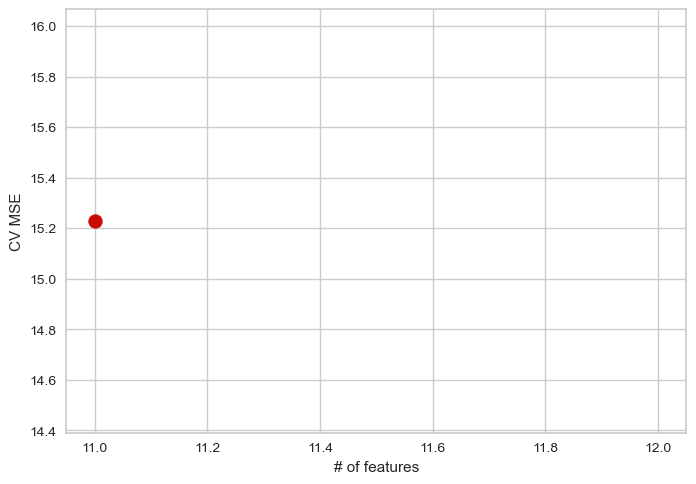

In [62]:
cv_err_mean = cv_err.apply(np.mean, axis=1)
plt.plot(cv_err_mean)
plt.xlabel('# of features')
plt.ylabel('CV MSE')
plt.scatter(cv_err_mean.argmin(), cv_err_mean.min(), s=100, c='r')

In [66]:
# LASSO
lassocv    = LassoCV(cv=10).fit(x[train], y[train]) # 10-fold CV
lasso_pred = lassocv.predict(x[test])
lasso_err  = mean_squared_error(y[test], lasso_pred) 
lasso_coef = pd.Series(lassocv.coef_, index = x[train].columns)
print(lasso_err)
print(lasso_coef.abs().sort_values(ascending=False))
print('# of non-zero coef estimates: %i' %lasso_coef[lasso_coef != 0].count())

33.261564782773924
rad        0.489001
medv       0.110911
indus      0.037110
black      0.015483
age        0.012979
tax        0.000773
chas       0.000000
nox        0.000000
rm         0.000000
dis        0.000000
ptratio    0.000000
lstat      0.000000
dtype: float64
# of non-zero coef estimates: 6


In [70]:
# Ridge
alphas     = 10**np.linspace(10,-2,100)*0.5
ridgecv    = RidgeCV(alphas=alphas, cv=10).fit(x[train], y[train]) # 10-fold CV
ridge_pred = ridgecv.predict(x[test])
ridge_err  = mean_squared_error(y[test], ridge_pred)
ridge_coef = pd.Series(ridgecv.coef_, index = x[train].columns)
print(ridge_err)
print(ridge_coef.abs().sort_values(ascending=False))

32.4687208159841
rad        0.505196
dis        0.403210
rm         0.324401
medv       0.160016
ptratio    0.145706
indus      0.134850
chas       0.099360
nox        0.070133
lstat      0.019964
black      0.014499
age        0.000479
tax        0.000055
dtype: float64


In [71]:
# PCR
# scale data
pca = PCA()
reduced_xtrain = pca.fit_transform(scale(x[train]))
# amount of variance explained by adding each principal component
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 49.28,  62.42,  71.42,  78.98,  85.67,  89.88,  93.02,  95.32,
        96.94,  98.49,  99.53, 100.  ])

In [72]:
# LOOCV with shuffle
ntrain = len(reduced_xtrain)
kf10   = KFold(n_splits=10, shuffle=True, random_state=1)

M = 12


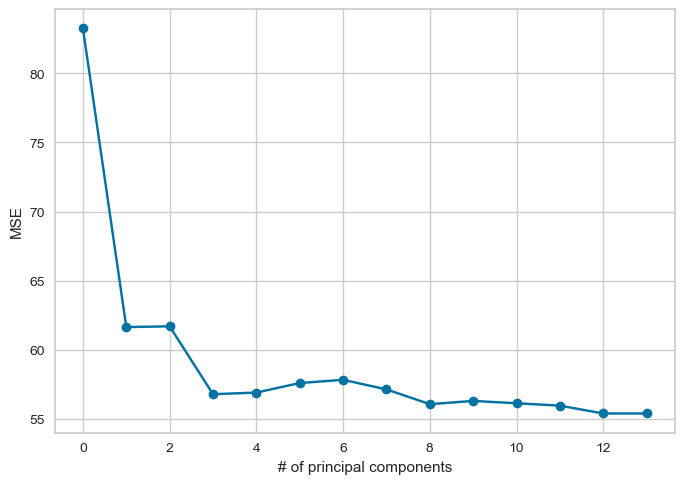

In [73]:
# pick M based on MSE
pcr    = LinearRegression()
mse    = []
# compute MSE with only intercept (no principal components)
score = -1*cross_val_score(pcr, np.ones((ntrain,1)), y[train].ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()    
mse.append(score)
# compute MSE with the 13 principle components, adding one at a time
for i in np.arange(1,14):
    score = -1*cross_val_score(pcr, reduced_xtrain[:,:i], y[train].ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
# plot MSE against # of components
plt.plot(mse, '-o')
plt.xlabel('# of principal components')
plt.ylabel('MSE')
# select M
M = mse.index(min(mse)) # index is 0 for intercept-only MSE
print('M = %i' %M) #12

In [75]:
# predict using M and test data
reduced_xtest = pca.transform(scale(x[test]))[:,:M+1]
pcr.fit(reduced_xtrain[:,:M+1], y[train])
pcr_pred = pcr.predict(reduced_xtest)
pcr_err  = mean_squared_error(y[test], pcr_pred) 
print(pcr_err)

32.99560193842984


## (b) Propose a model (or set of models) that seem to perform well onthis data set, and justify your answer. Make sure that you are evaluating model performance using validation set error, cross-Validation, or some other reasonable alternative, as opposed tousing training error.

             errors
fwd    1.425056e+06
ridge  3.246872e+01
lasso  3.326156e+01
pcr    3.299560e+01


Text(0, 0.5, 'test MSE')

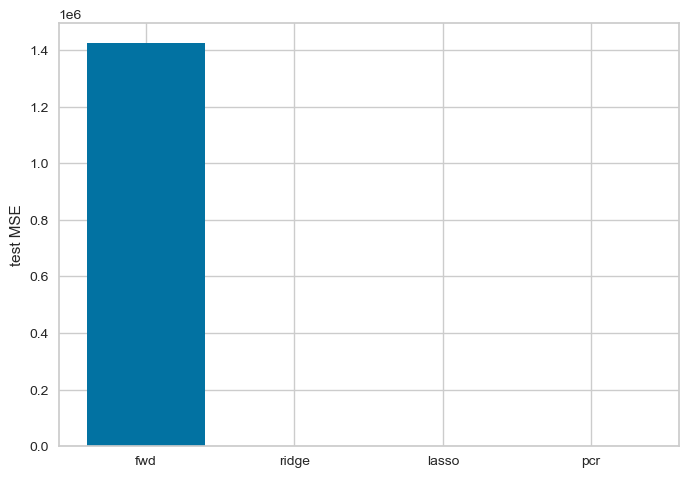

In [79]:
err = pd.DataFrame({'errors': [lm_err, ridge_err, lasso_err, pcr_err]})
err.rename(index={0:'fwd', 1:'ridge', 2:'lasso', 3:'pcr'}, inplace=True) 
print(err)

x_label = np.arange(4)
plt.bar(x_label, err.errors)
plt.xticks(x_label, ('fwd', 'ridge', 'lasso', 'pcr'))
plt.ylabel('test MSE')

- The best performing model with regards to cross-validation MSE was ridge and subset forward performed the worst. 

## (c) Does your chosen model involve all of the features in the dataset? Why or why not?

- No, my chosen model does not involve all the features in the dataset because it would barely improve our prediction accuracy. 